## 데이터 기초 정보 살펴보기

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/MyDrive/이것이데이터분석이다/ch1/drinks.csv'
df = pd.read_csv(file_path)

df.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     170 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB


In [ ]:
df.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


## 탐색과 시각화
### [피처간의 상관관계 탐색]

In [ ]:
corr = df[['beer_servings', 'wine_servings']].corr(method='pearson')
print(corr)

               beer_servings  wine_servings
beer_servings       1.000000       0.527172
wine_servings       0.527172       1.000000


In [ ]:
corr = df.corr()
corr

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
beer_servings,1.000000,0.458819,0.527172,0.835839
spirit_servings,0.458819,1.000000,0.194797,0.654968
wine_servings,0.527172,0.194797,1.000000,0.667598
total_litres_of_pure_alcohol,0.835839,0.654968,0.667598,1.000000


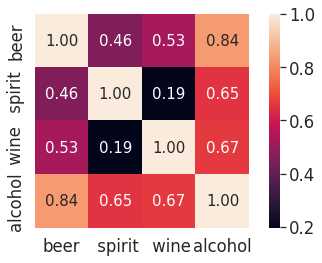

In [ ]:
import seaborn as sns

cols_view = ['beer', ' spirit', ' wine', 'alcohol']
sns.set(font_scale=1.5)
hm = sns.heatmap(corr,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size':15},
                 yticklabels=cols_view,
                 xticklabels=cols_view)

plt.tight_layout()
plt.show()

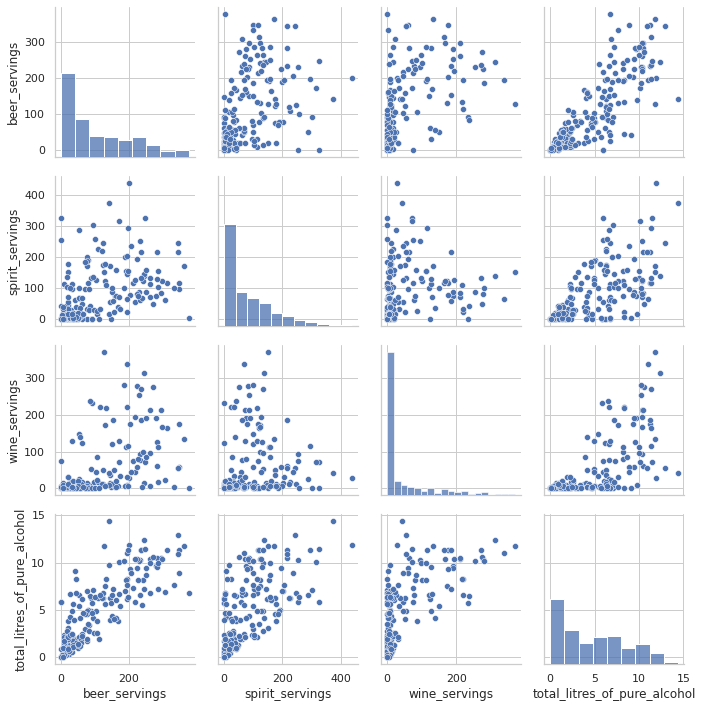

In [ ]:
sns.set(style='whitegrid', context='notebook')
sns.pairplot(df[['beer_servings', 'spirit_servings', 'wine_servings','total_litres_of_pure_alcohol']], height=2.5)
plt.show()

## 탐색적 분석 : 스무고개로 분석하는 개념적 탐색
### [결측 데이터 전처리]

In [ ]:
print(df.isnull().sum())
print('-----------------------------------')
print(df.dtypes)

country                          0
beer_servings                    0
spirit_servings                  0
wine_servings                    0
total_litres_of_pure_alcohol     0
continent                       23
dtype: int64
-----------------------------------
country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object


In [ ]:
df['continent'] = df['continent'].fillna('OT')
df.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [ ]:
df[df['continent']=='OT'].head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
5,Antigua & Barbuda,102,128,45,4.9,OT
11,Bahamas,122,176,51,6.3,OT
14,Barbados,143,173,36,6.3,OT
17,Belize,263,114,8,6.8,OT
32,Canada,240,122,100,8.2,OT


파이차트 시각화

In [ ]:
df['continent'].value_counts()

AF    53
EU    45
AS    44
OT    23
OC    16
SA    12
Name: continent, dtype: int64

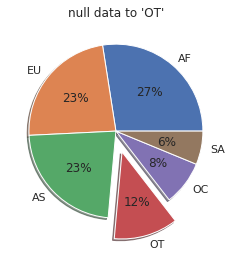

In [ ]:
labels = df['continent'].value_counts().index.tolist()
fracsl = df['continent'].value_counts().values.tolist()
explode = (0,0,0,0.25,0,0)

plt.pie(fracsl, explode=explode, labels=labels, autopct='%.0f%%', shadow=True)
plt.title('null data to \'OT\'')
plt.show()

### [그룹 단위의 데이터 분석 : 대륙별 분석]

In [ ]:
result = df.groupby('continent').spirit_servings.agg(['mean','min','max','sum'])
result.head()

,mean,min,max,sum
continent,,,,
AF,16.339623,0,152,866
AS,60.840909,0,326,2677
EU,132.555556,0,373,5965
OC,58.437500,0,254,935
OT,165.739130,68,438,3812


In [ ]:
# 전체 평균보다 많은 알코올을 섭취하는 대륙 구하기
total_mean = df.total_litres_of_pure_alcohol.mean()
continent_mean = df.groupby('continent')['total_litres_of_pure_alcohol'].mean()
continent_over_mean = continent_mean[continent_mean >= total_mean]
print(continent_over_mean)

continent
EU    8.617778
OT    5.995652
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64


In [ ]:
best_continent = df.groupby('continent').beer_servings.mean().idxmax()
print(best_continent)

EU


### 분석 결과에 대한 시각화

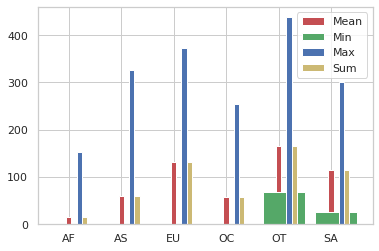

In [ ]:
# 대륙별 spirit_servings의 평균, 최소, 최대, 합계를 시각화하기
n_groups = len(result.index)
means = result['mean'].tolist()
mins = result['min'].tolist()
maxs = result['max'].tolist()
sums = result['sum'].tolist()

index = np.arange(n_groups)
bar_width = 0.1

rects1 = plt.bar(index, means, bar_width, color='r', label='Mean')

rects2 = plt.bar(index + bar_width, mins, color='g', label='Min')

rects3 = plt.bar(index + bar_width*2, maxs, bar_width, color='b', label='Max')

rects4 = plt.bar(index + bar_width*3, means, bar_width, color='y', label='Sum')

plt.xticks(index, result.index.tolist())
plt.legend()
plt.show()

In [ ]:
continent_mean

continent
AF    3.007547
AS    2.170455
EU    8.617778
OC    3.381250
OT    5.995652
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64

In [ ]:
print(continent_mean.tolist())

[3.0075471698113208, 2.1704545454545454, 8.617777777777778, 3.38125, 5.995652173913044, 6.308333333333334]


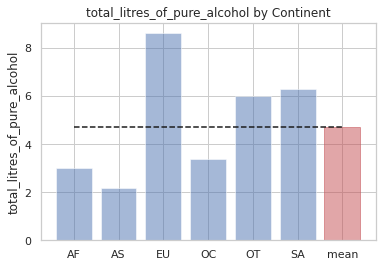

In [ ]:
# 대륙별 total_litres_of_pure_alcohol을 시각화
continents = continent_mean.index.tolist()
continents.append('mean')
x_pos = np.arange(len(continents))
alcohol = continent_mean.tolist()
alcohol.append(total_mean)

bar_list = plt.bar(x_pos, alcohol, align='center', alpha=0.5)
bar_list[len(continents) - 1].set_color('r')
# 인덱스 0번째부터 6번째까지 'total_mean' 크기에 'k--' 모양으로 선 긋기
plt.plot([0., 6], [total_mean, total_mean], "k--")
plt.xticks(x_pos, continents)

plt.ylabel('total_litres_of_pure_alcohol')
plt.title('total_litres_of_pure_alcohol by Continent')

plt.show()

In [ ]:
df.groupby('continent')['beer_servings'].sum()

continent
AF    3258
AS    1630
EU    8720
OC    1435
OT    3345
SA    2101
Name: beer_servings, dtype: int64

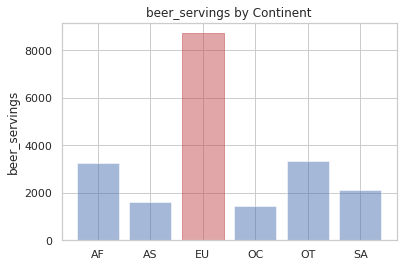

In [ ]:
beer_group = df.groupby('continent')['beer_servings'].sum()
continents = beer_group.index.tolist()
y_pos = np.arange(len(continents))
alcohol = beer_group.tolist()

bar_list = plt.bar(y_pos , alcohol, align='center', alpha=0.5)
bar_list[continents.index('EU')].set_color('r')
plt.xticks(y_pos, continents)

plt.ylabel('beer_servings')
plt.title('beer_servings by Continent')
 
plt.show()

## 통계적 분석 : 분석 대상간의 통계적 차이 검정하기

In [ ]:
africa = df.loc[df['continent']=='AF']
europe = df.loc[df['continent']=='EU']

from scipy import stats
tTestResult = stats.ttest_ind(africa['beer_servings'], europe['beer_servings'])
tTestResultDiffVar = stats.ttest_ind(africa['beer_servings'], europe['beer_servings'], equal_var=False)

print("The t-statistic and p-value assuming equal variances is %.3f and %.3f." % tTestResult)
print("The t-statistic and p-value not assuming equal variances is %.3f and %.3f" % tTestResultDiffVar)

The t-statistic and p-value assuming equal variances is -7.268 and 0.000.
The t-statistic and p-value not assuming equal variances is -7.144 and 0.000


## 대한민국은 얼마나 술을 독하게 마시는 나라일까?

In [ ]:
# total_servings 피처 생성
df['total_servings'] = df['beer_servings'] + df['wine_servings'] + df['spirit_servings']

# 술 소비량 대비 알콜 비율 피처 생성
df['alcohol_rate'] = df['total_litres_of_pure_alcohol'] / df['total_servings']
df['alcohol_rate'] = df['alcohol_rate'].fillna(0)

# 순위 정보 생성
country_with_rank = df[['country', 'alcohol_rate']]
country_with_rank = country_with_rank.sort_values(by=['alcohol_rate'],ascending=False)
country_with_rank.head()

,country,alcohol_rate
63,Gambia,0.266667
153,Sierra Leone,0.223333
124,Nigeria,0.185714
179,Uganda,0.153704
142,Rwanda,0.151111


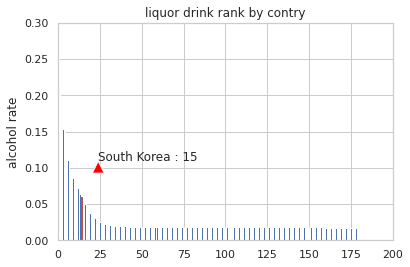

In [ ]:
# 국가별 순위 정보를 그래프로 시각화
country_list = country_with_rank.country.tolist()
x_pos = np.arange(len(country_list))
rank = country_with_rank.alcohol_rate.tolist()

bar_list = plt.bar(x_pos, rank)
# country_list 리스트 변수에 나라명이 저장되어 있으므로 index() 메소드를 통해 나라명에 해당하는 인덱스를 구한다.
bar_list[country_list.index('South Korea')].set_color('r')
plt.ylabel('alcohol rate')
plt.title('liquor drink rank by contry')
plt.axis([0, 200, 0 , 0.3])

korea_rank = country_list.index('South Korea')
korea_alc_rate = country_with_rank[country_with_rank['country'] == 'South Korea']['alcohol_rate'].values[0]
# 주석 다는 시각화 함수
plt.annotate('South Korea : ' + str(korea_rank + 1),
             xy = (korea_rank + 10, korea_alc_rate + 0.05),
             arrowprops = dict(facecolor='red', shrink=0.05))

plt.show()

In [ ]:
country_list = country_with_rank.country.tolist()
print(country_list)

['Gambia', 'Sierra Leone', 'Nigeria', 'Uganda', 'Rwanda', 'Tanzania', 'Burkina Faso', 'Central African Republic', "Cote d'Ivoire", 'Mali', 'Sudan', 'Malawi', 'Burundi', 'DR Congo', 'South Korea', 'Zimbabwe', 'Swaziland', 'Zambia', 'Ghana', 'Cameroon', 'Laos', 'Guinea-Bissau', 'Ethiopia', 'Eritrea', 'Belarus', 'Lesotho', 'Japan', 'Chad', 'Togo', 'Botswana', 'Kenya', 'Benin', 'South Africa', 'New Zealand', 'Finland', 'Lithuania', 'Comoros', 'Saudi Arabia', 'Estonia', 'Congo', 'United Kingdom', 'Ireland', 'Australia', 'Argentina', 'Slovakia', 'Latvia', 'Mozambique', 'Cabo Verde', 'Angola', 'Sri Lanka', 'Portugal', 'Ukraine', 'France', 'Guinea', 'Egypt', 'Nepal', 'Norway', 'St. Lucia', 'Dominica', 'Sweden', 'Jamaica', 'Spain', 'Singapore', 'Paraguay', 'Azerbaijan', 'Switzerland', 'Bahamas', 'Turkmenistan', 'Armenia', 'Vanuatu', 'Qatar', 'Haiti', 'Cook Islands', 'Montenegro', 'Sao Tome & Principe', 'Oman', 'Algeria', 'United Arab Emirates', 'Georgia', 'Guyana', 'Greece', 'Lebanon', 'China',

In [ ]:
country_list.index('South Korea')

14

In [ ]:
country_with_rank[country_with_rank['country'] == 'South Korea']['alcohol_rate']

138    0.059394
Name: alcohol_rate, dtype: float64

### [대륙별 wine_servings 탐색]

In [ ]:
# 대륙별 평균 wine_servings 피처를 만들어서 병합합니다.
result = df.groupby('continent').mean()['wine_servings']
# to_frame() 데이터 프레임으로 변환 후 인덱스 리셋
df2 = result.to_frame().reset_index()
df2 = df2.rename(columns={'wine_servings': 'wine_servings_cont_avg'})
df = pd.merge(df, df2, on='continent', how='outer')

# 위와 같은 방법의 코드입니다.
# drinks['wine_servings_cont_avg'] = drinks.groupby('continent')['wine_servings'].transform(np.mean)

df[['country', 'continent', 'wine_servings_cont_avg']].sample(5).head()

,country,continent,wine_servings_cont_avg
119,Mali,AF,16.264151
75,Poland,EU,142.222222
179,Fiji,OC,35.625000
12,Israel,AS,9.068182
24,Nepal,AS,9.068182


In [ ]:
df.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,total_servings,alcohol_rate,wine_servings_cont_avg
0,Afghanistan,0,0,0,0.0,AS,0,0.000000,9.068182
1,Bahrain,42,63,7,2.0,AS,112,0.017857,9.068182
2,Bangladesh,0,0,0,0.0,AS,0,0.000000,9.068182
3,Bhutan,23,0,0,0.4,AS,23,0.017391,9.068182
4,Brunei,31,2,1,0.6,AS,34,0.017647,9.068182


### [국가별 total_servings 피처 생성]

In [ ]:
df['total_servings'] = df['beer_servings'] + df['wine_servings'] + df['spirit_servings']

df[['country', 'beer_servings', 'wine_servings', 'spirit_servings', 'total_servings']].sample(5).head()

,country,beer_servings,wine_servings,spirit_servings,total_servings
31,Saudi Arabia,0,0,5,5
82,Slovenia,270,276,51,597
188,Samoa,105,24,18,147
190,Tonga,36,5,21,62
57,Estonia,224,59,194,477


In [ ]:
# 전체 평균보다 적은 알코올을 섭취하는 대륙 중에서, spirit을 가장 많이 마시는 국가를 구합니다.

# 전체 알코올 평균
total_mean = df.total_litres_of_pure_alcohol.mean()
# 대륙별 알코올 평균
continent_mean = df.groupby('continent').total_litres_of_pure_alcohol.mean()
# 전체 평균보다 작은 대륙 구하기
continent_under_mean = continent_mean[continent_mean <= total_mean].index.tolist()
df_continent_under_mean = df.loc[df.continent.isin(continent_under_mean)]

most_spirit_under_mean = df_continent_under_mean.loc[df_continent_under_mean['spirit_servings'].idxmax()]
most_spirit_under_mean['country']

'Russian Federation'

In [ ]:
# 술 소비량 대비 알콜 비율에 대한 칼럼을 만들어서 병합합니다.
df['alcohol_rate'] = df['total_litres_of_pure_alcohol'] / df['total_servings']
df['alcohol_rate'] = df['alcohol_rate'].fillna(0)

# 술 소비량 대비 알콜 비율 : 전체 순위 중 한국의 순위를 구합니다.
df['alcohol_rate_rank'] = df['alcohol_rate'].rank(ascending=False)
df['alcohol_rate_rank'] = df['alcohol_rate_rank'].apply(np.floor)
df.loc[df['country'] == 'South Korea'].alcohol_rate_rank

29    15.0
Name: alcohol_rate_rank, dtype: float64

In [ ]:
# 대륙별 술 소비량 대비 알콜 비율을 구합니다.
continent_sum = df.groupby('continent').sum()
continent_sum['alcohol_rate_continent'] = continent_sum['total_litres_of_pure_alcohol'] / \
                                          continent_sum['total_servings']
continent_sum = continent_sum.reset_index()
continent_sum = continent_sum[['continent', 'alcohol_rate_continent']]

df = pd.merge(df, continent_sum, on='continent', how='outer')
df[['country', 'continent', 'alcohol_rate_continent']].sample(5).head()

,country,continent,alcohol_rate_continent
143,Bahamas,OT,0.017860
177,Australia,OC,0.018401
169,Colombia,SA,0.017909
36,Thailand,AS,0.020293
68,Lithuania,EU,0.018392


In [ ]:
df.groupby('continent').sum()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,total_servings,alcohol_rate,wine_servings_cont_avg,alcohol_rate_rank
continent,,,,,,,,
AF,3258,866,862,159.4,4986,2.636258,862.0,3169.0
AS,1630,2677,399,95.5,4706,0.719797,399.0,5310.0
EU,8720,5965,6400,387.8,21085,0.788717,6400.0,4248.0
OC,1435,935,570,54.1,2940,0.270327,570.0,1970.0
OT,3345,3812,564,137.9,7721,0.410644,564.0,2540.0
SA,2101,1377,749,75.7,4227,0.214415,749.0,1460.0
